## Первая часть кейса

In [ ]:
zero_df <- read.csv('wine_reviews_brazil.csv', sep =';', na.strings = '')

1)Удалить повторяющиеся строки из данных

In [ ]:
df <- unique(zero_df)

In [ ]:
price_na <- df$price[df$price == 'NA']
points_na <- df$points[df$points == 'NA']

 2) Привести описательные статистики по переменным price и points. Минимально необходимые статистики:

In [ ]:
df$price[df$price == 'NA'] <- mean(c(as.integer(df$price[df$price != 'NA'])))
df$price <- as.integer(df$price)

cat("PRICE", "\n")
cat("Число непустых значений:", length(df$price) - length(price_na), "\n")
cat("Среднее значение:", mean(df$price), "\n")
cat("Стандартное отклонение:", sd(df$price), "\n")
cat("Медиана:", median(df$price), "\n")
cat("Мин. и макс. значения:", min(df$price), max(df$price), "\n")
cat("Размах:", max(df$price) - min(df$price), "\n", " ", "\n")

df$points[df$points == 'NA'] <- mean(c(as.integer(df$points[df$points != 'NA'])))
df$points <- as.integer(df$points)

cat("POINTS", "\n")
cat("Число непустых значений:", length(df$points) - length(points_na), "\n")
cat("Среднее значение:", mean(df$points), "\n")
cat("Стандартное отклонение:", sd(df$points), "\n")
cat("Медиана:", median(df$points), "\n")
cat("Мин. и макс. значения:", min(df$points), max(df$points), "\n")
cat("Размах:", max(df$points) - min(df$points), "\n")


PRICE 
Число непустых значений: 52 
Среднее значение: 23.69231 
Стандартное отклонение: 10.50031 
Медиана: 23 
Мин. и макс. значения: 10 60 
Размах: 50 
   
POINTS 
Число непустых значений: 52 
Среднее значение: 84.67308 
Стандартное отклонение: 2.340782 
Медиана: 85 
Мин. и макс. значения: 80 89 
Размах: 9 


3) Отобразить гистограмму / плотность распределения для переменных points и price. Использовать пакет ggplot2 для визуализации. Минимум 2 графика.

In [ ]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



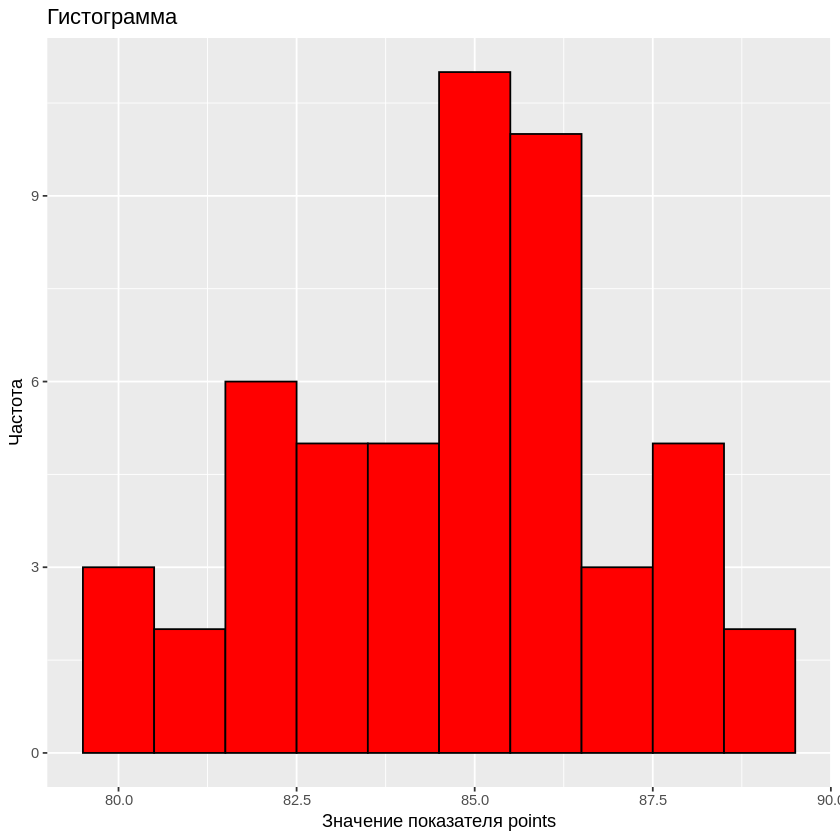

In [ ]:
df_points <- data.frame(
  x = df$points,
  y = df$points
)
ggplot(df_points, aes(x = x))+
  geom_histogram(binwidth = 1, fill = "red", color = "black")+
  labs(title = "Гистограмма", x = "Значение показателя points", y = "Частота")

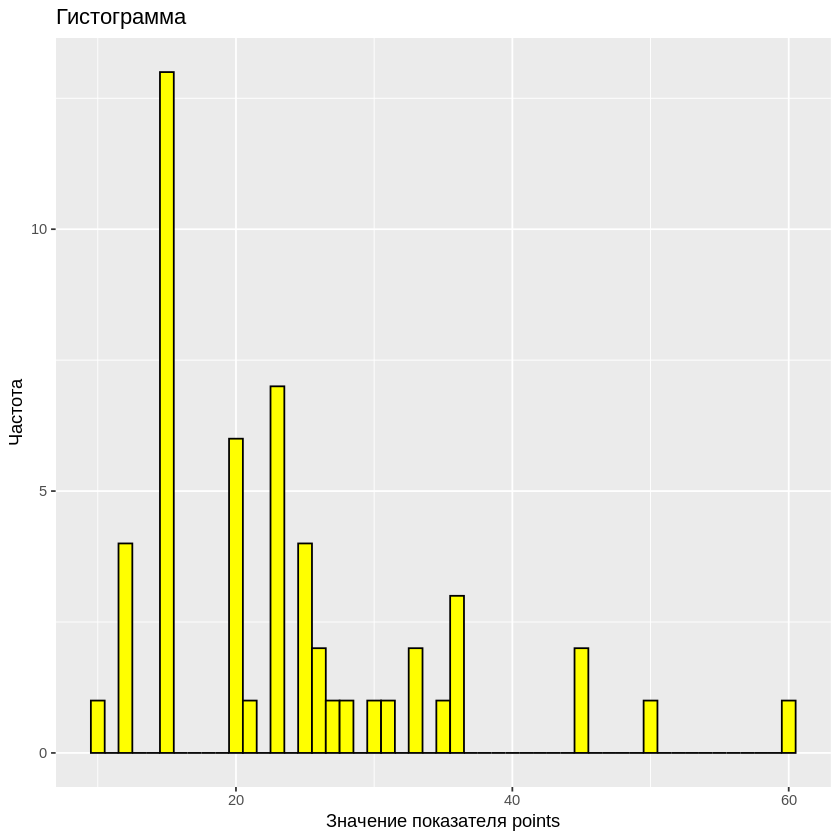

In [ ]:
df_price <- data.frame(
  x = df$price,
  y = df$price
)
ggplot(df_price, aes(x = x))+
  geom_histogram(binwidth = 1, fill = "yellow", color = "black")+
  labs(title = "Гистограмма", x = "Значение показателя points", y = "Частота")

4) Рассчитать корреляцию между переменными points и price.
*   Отразить коэффициент корреляции и p-value
*   Отразить доверительный интервал для коэффициента корреляции

In [ ]:
cor.test(df$points, df$price, method = 'pearson')


	Pearson's product-moment correlation

data:  df$points and df$price
t = 2.1122, df = 50, p-value = 0.03969
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01443539 0.51860241
sample estimates:
      cor 
0.2862082 


5) Сформулировать комплексные выводы по результатам анализа.
Для этого ответьте на вопросы: по какой винодельне представлено наибольшее количество данных и что это означает; что характеризуют полученные описательные статистики для изучаемой страны, какая взаимосвязь прослеживается между переменными, и о чем это свидетельствует. Выводы должны быть не оборваны, а взаимосвязаны друг с другом - соблюдайте последовательность в их изложении. При необходимости постройте дополнительные графики.


In [ ]:
table(df$winery)


  Aurora Cellars      Casa Perini     Casa Valduga      Cave Geisse 
               1               12                6                6 
  Château Lacave    Lidio Carraro            Miolo          Pizzato 
               1                9                4                1 
          Salton Villaggio Grando  Vinícola Aurora 
               8                2                2 

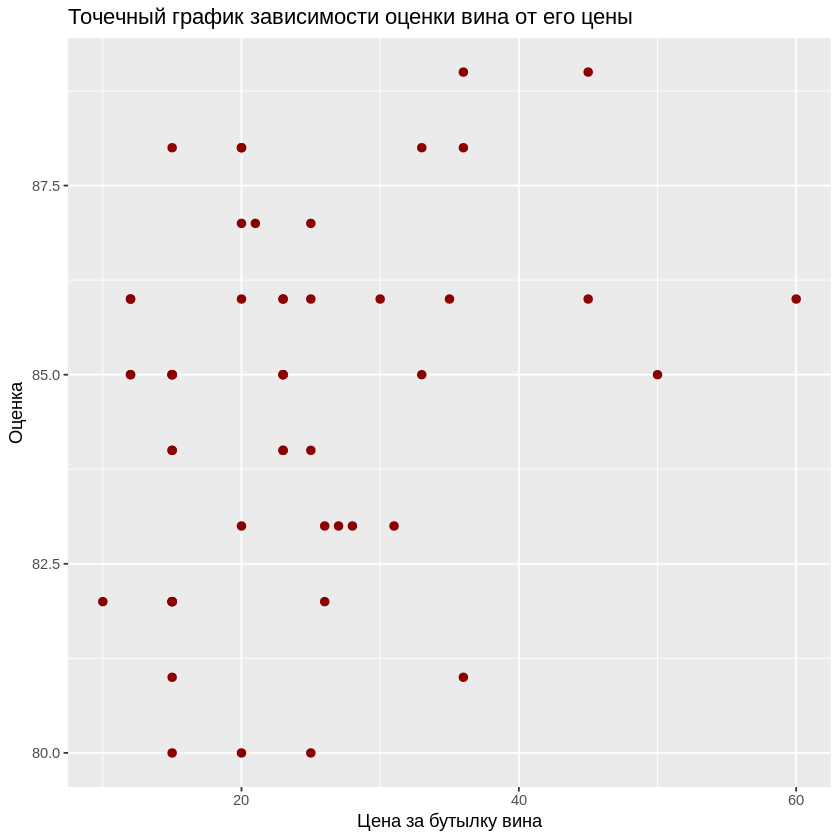

In [ ]:
df2 <- data.frame(
  x = df$price,
  y = df$points
)
ggplot(df2, aes(x = x, y = y)) +
  geom_point(color = "darkred", size = 2) +
  labs(title = "Точечный график зависимости оценки вина от его цены", x = "Цена за бутылку вина", y = "Оценка")

Warning message:
“Use of `df_filtered$price` is discouraged.
ℹ Use `price` instead.”
Warning message:
“Use of `df_filtered$points` is discouraged.
ℹ Use `points` instead.”
Warning message:
“Use of `df_filtered$price` is discouraged.
ℹ Use `price` instead.”
Warning message:
“Use of `df_filtered$points` is discouraged.
ℹ Use `points` instead.”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


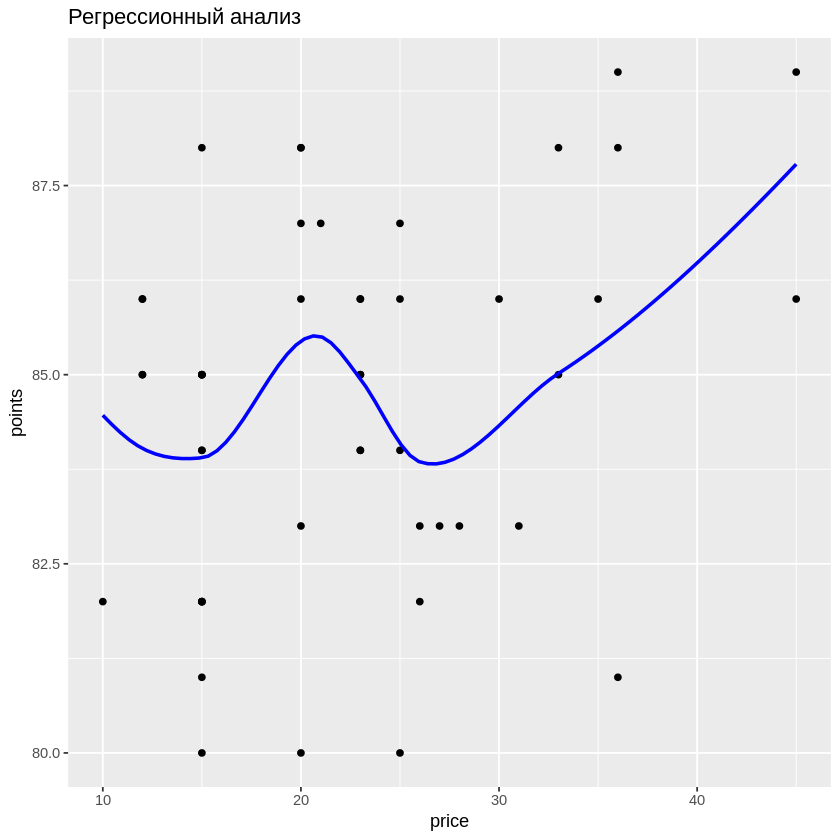

In [ ]:
#очистим данные от выбросов
Q1 <- quantile(df$price, 0.25)
Q3 <- quantile(df$price, 0.75)
IQR <- Q3 - Q1
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

df_filtered <- df[df$price >= lower_bound & df$price <= upper_bound, c("price", "points")]

ggplot(df_filtered, aes(x = df_filtered$price, y = df_filtered$points)) +
  geom_point() + # точки данных
  geom_smooth(method = "auto", se = FALSE, color = "blue") + # линия регрессии
  labs(title = "Регрессионный анализ", x = "price", y = "points")

Warning message:
“Use of `df$price` is discouraged.
ℹ Use `price` instead.”


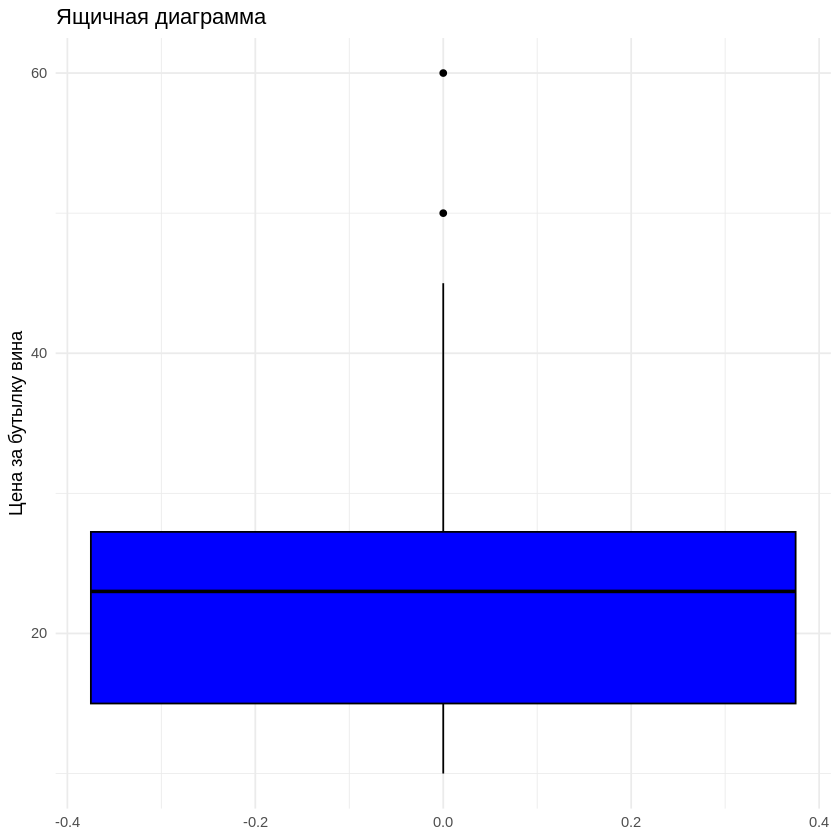

In [ ]:
ggplot(df, aes(y = df$price)) +
  geom_boxplot(fill = "blue", color = "black") +
  labs(title = "Ящичная диаграмма", y = "Цена за бутылку вина") +
  theme_minimal()

## Вторая часть кейса

In [ ]:
install.packages("ggplot2")
install.packages("gtable")
install.packages("gridExtra")
library(ggplot2)
library(gtable)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df <- read.csv("2-часть.csv", sep =',', na.strings = '')


1)     Оцените выбросы в распределении переменных, удалите их, если они есть и составляют малую долю в данных (вы можете удалить выбросы выборочно). Проверьте однородность переменных с помощью правила трех сигм/межквартильного размаха до и после удаления выбросов. Сделайте выводы.


In [ ]:
# Создаем подмножество столбца x2, удаляя выбросы
df_x2 <- df$x2[as.numeric(df$x2) <= quantile(as.numeric(df$x2), 0.75) + IQR(df$x2)*1.5 &
                            as.numeric(df$x2) >= quantile(as.numeric(df$x2), 0.25) - 1.5*IQR(df$x2)]

# Создаем подмножество столбца x4, удаляя выбросы
df_x4 <- df$x4[as.numeric(df$x4) <= quantile(as.numeric(df$x4), 0.75) + IQR(df$x4)*1.5 &
                            as.numeric(df$x4) >= quantile(as.numeric(df$x4), 0.25) - 1.5*IQR(df$x4)]



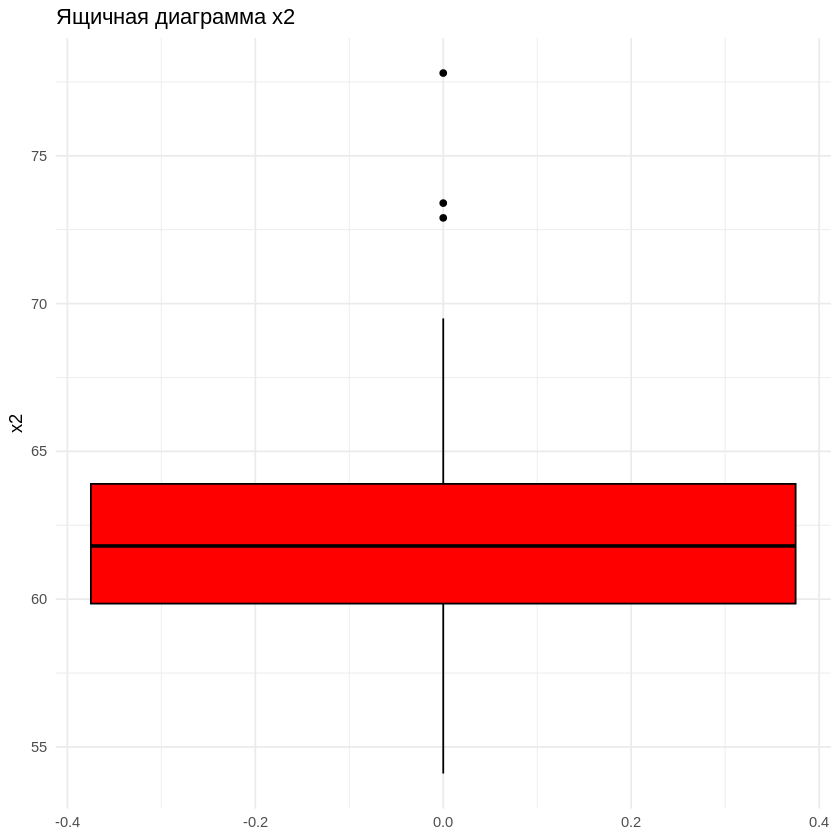

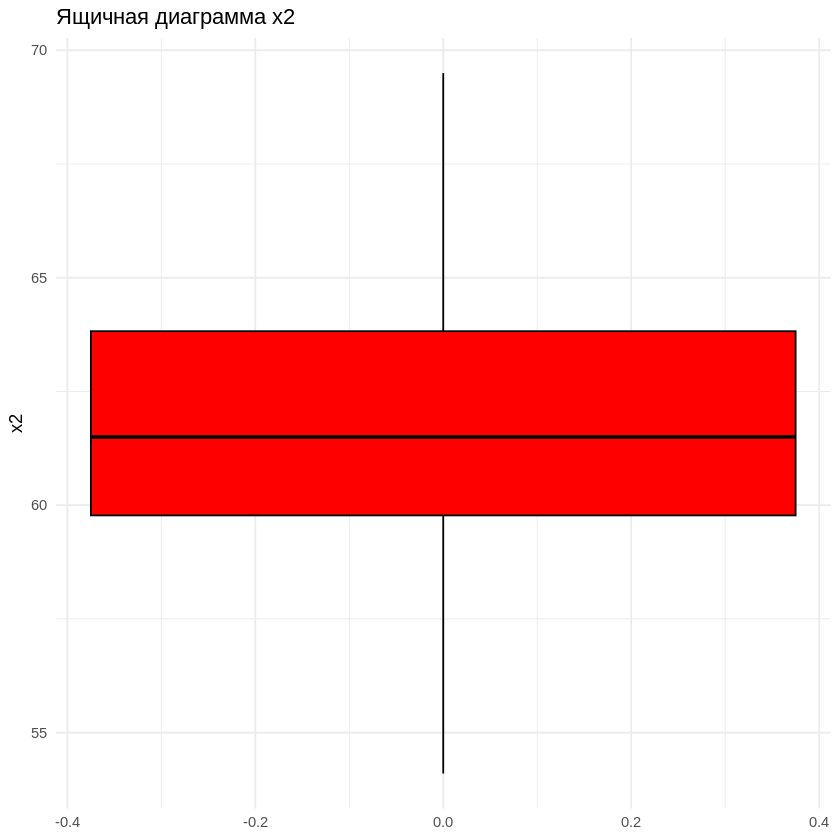

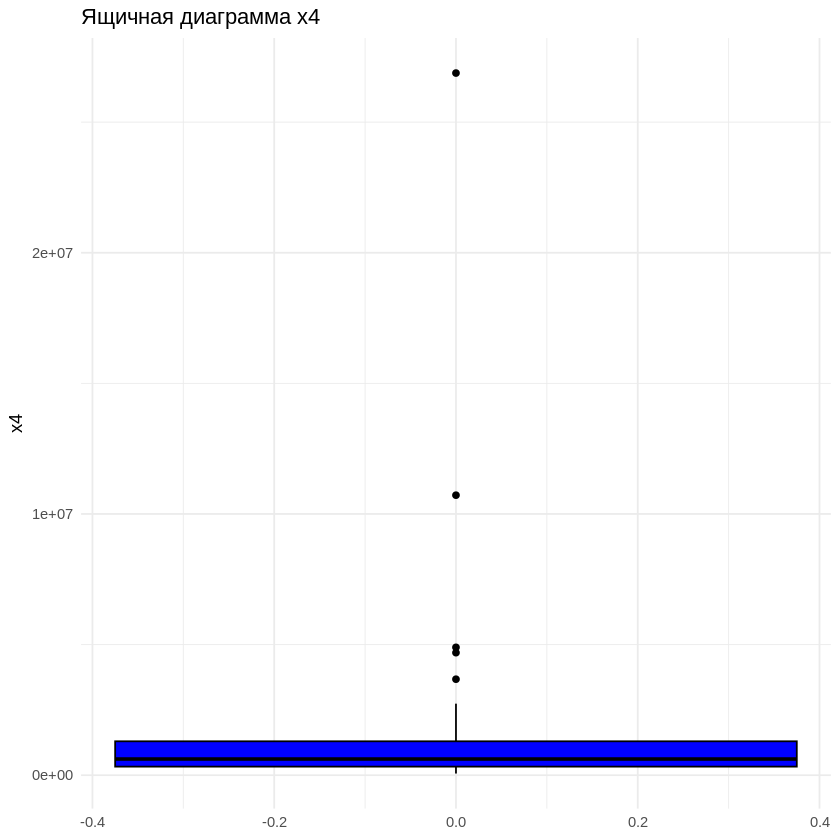

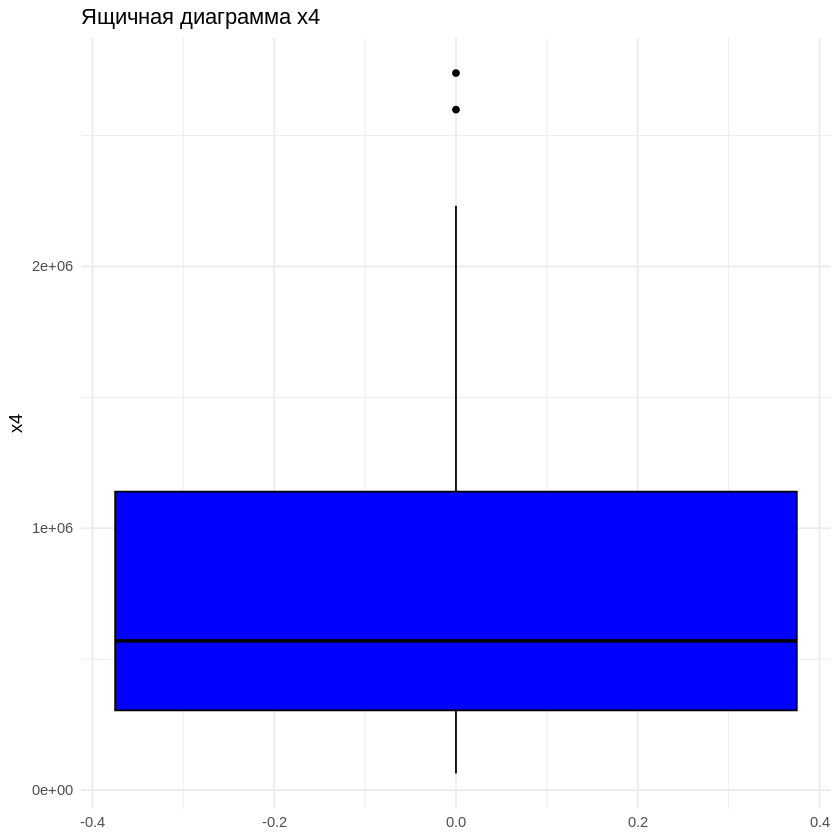

In [ ]:
# Создаем ящичную диаграмму для исходного x2
plot2 <- ggplot(df, aes(y = x2))  +
  geom_boxplot(fill = "red", color = "black") +
  labs(title = "Ящичная диаграмма x2", y = "x2")+
  theme_minimal()

# Создаем ящичную диаграмму для исходного x4
plot4 <- ggplot(df, aes(y = x4))  +
  geom_boxplot(fill = "blue", color = "black") +
  labs(title = "Ящичная диаграмма x4", y = "x4")+
  theme_minimal()


# Создаем датафреймы для x2 и x4 после удаления выбросов (предполагается, что df_x2 и df_x4 уже содержат очищенные данные)
df2 <- data.frame(
  x = df_x2,
  y = df_x2
)
df4 <- data.frame(
  x = df_x4,
  y = df_x4
)

# Создаем ящичную диаграмму для x2 после удаления выбросов
plot2_new <- ggplot(df2, aes(y = x))  +
  geom_boxplot(fill = "red", color = "black") +
  labs(title = "Ящичная диаграмма x2", y = "x2") +
  theme_minimal()

# Создаем ящичную диаграмму для x4 после удаления выбросов
plot4_new <- ggplot(df4, aes(y = x))  +
  geom_boxplot(fill = "blue", color = "black") +
  labs(title = "Ящичная диаграмма x4", y = "x4") +
  theme_minimal()

# Отображаем все четыре графика
plot2
plot2_new
plot4
plot4_new



In [ ]:
#IQR до удаления выбросов
q1_before_2 = quantile(df$x2, 0.25, na.rm = TRUE) # Первый квартиль x2 до очистки
q3_before_2 = quantile(df$x2, 0.75, na.rm = TRUE) # Третий квартиль x2 до очистки
iqr_before_2 = q3_before_2 - q1_before_2       # IQR x2 до очистки

q1_before_4 = quantile(df$x4, 0.25, na.rm = TRUE) # Первый квартиль x4 до очистки
q3_before_4 = quantile(df$x4, 0.75, na.rm = TRUE) # Третий квартиль x4 до очистки
iqr_before_4 = q3_before_4 - q1_before_4       # IQR x4 до очистки


#IQR после удаления выбросов
q1_after_2 <- quantile(df_x2, 0.25, na.rm = TRUE)
q3_after_2 <- quantile(df_x2, 0.75, na.rm = TRUE)
iqr_after_2 <- q3_after_2 - q1_after_2

q1_after_4 <- quantile(df_x4, 0.25, na.rm = TRUE)
q3_after_4 <- quantile(df_x4, 0.75, na.rm = TRUE)
iqr_after_4 <- q3_after_4 - q1_after_4

iqr_before_2
iqr_after_2

iqr_before_4
iqr_after_4

75% 
4.05

75% 
4.05

75% 
969765.2

75% 
835356.4

In [ ]:
cat("Среднее х2 до удаления выбросов: ", mean(df$x2), "\n")
cat("Среднее х2 после удаления выбросов: ", mean(df_x2), "\n")
cat( "\n")
cat("Медиана х2 до удаления выбросов: ", median(df$x2), "\n")
cat("Медиана х2 после удаления выбросов: ", median(df_x2), "\n")

Среднее х2 до удаления выбросов:  62.36076 
Среднее х2 после удаления выбросов:  61.87368 

Медиана х2 до удаления выбросов:  61.8 
Медиана х2 после удаления выбросов:  61.5 


In [ ]:
cat("Среднее х4 до удаления выбросов: ", mean(df$x4), "\n")
cat("Среднее х4 после удаления выбросов: ", mean(df_x4), "\n")
cat( "\n")
cat("Медиана х4 до удаления выбросов: ", median(df$x4), "\n")
cat("Медиана х4 после удаления выбросов: ", median(df_x4), "\n")

Среднее х4 до удаления выбросов:  1359037 
Среднее х4 после удаления выбросов:  763596.8 

Медиана х4 до удаления выбросов:  619689.7 
Медиана х4 после удаления выбросов:  569747.5 


In [ ]:
# Возвращает TRUE или FALSЕ в зависимости от того, входит ли значение в межквартильных размах или нет
remove_outliers_iqr <- function(x) {
  q1 <- quantile(x, 0.25, na.rm = TRUE)
  q3 <- quantile(x, 0.75, na.rm = TRUE)
  iqr <- q3 - q1
  lower_bound <- q1 - 1.5 * iqr
  upper_bound <- q3 + 1.5 * iqr
  x >= lower_bound & x <= upper_bound
}

outlier_indices_x2 <- !remove_outliers_iqr(df$x2)
outlier_indices_x4 <- !remove_outliers_iqr(df$x4)

# Комбинирует индексы выбросов (если есть строка с выбросом (либо Х2, либо Х4), то она удаляется)
combined_outlier_indices <- outlier_indices_x2 | outlier_indices_x4

# Удаляются строки с выбросами из трех столбцов
df_cleaned <- df[!combined_outlier_indices, c("y", "x2", "x4")]

In [ ]:
cor.test(df_cleaned$y, df_cleaned$x2, method = 'pearson')
cor.test(df_cleaned$y, df_cleaned$x4, method = 'pearson')
cor.test(df_cleaned$x2, df_cleaned$x4, method = 'pearson')


	Pearson's product-moment correlation

data:  df_cleaned$y and df_cleaned$x2
t = 4.9245, df = 69, p-value = 5.555e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3140175 0.6642365
sample estimates:
      cor 
0.5099608 



	Pearson's product-moment correlation

data:  df_cleaned$y and df_cleaned$x4
t = 4.1204, df = 69, p-value = 0.0001035
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2354839 0.6140198
sample estimates:
     cor 
0.444374 



	Pearson's product-moment correlation

data:  df_cleaned$x2 and df_cleaned$x4
t = 3.0872, df = 69, p-value = 0.002909
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1252459 0.5379513
sample estimates:
      cor 
0.3483701 


In [ ]:

model <- lm(df$y ~ df$x2 + df$x4, data = df)
#выводим параметры
summary(model)



Call:
lm(formula = df$y ~ df$x2 + df$x4, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-997.09 -251.26  -78.25  186.17 2640.10 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.940e+03  9.062e+02  -4.348 4.21e-05 ***
df$x2        7.828e+01  1.460e+01   5.361 8.58e-07 ***
df$x4        5.480e-05  1.812e-05   3.024   0.0034 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 501.6 on 76 degrees of freedom
Multiple R-squared:  0.3951,	Adjusted R-squared:  0.3792 
F-statistic: 24.82 on 2 and 76 DF,  p-value: 5.046e-09


In [ ]:
model <- lm(y ~ x2 + x4, data = data)
#выводим параметры
summary(model)


Call:
lm(formula = y ~ x2 + x4, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-841.22 -204.82  -42.01  161.61 2580.19 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.561e+03  1.092e+03  -3.260 0.001742 ** 
x2           6.963e+01  1.809e+01   3.849 0.000265 ***
x4           2.559e-04  8.852e-05   2.890 0.005159 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 427 on 68 degrees of freedom
Multiple R-squared:  0.341,	Adjusted R-squared:  0.3216 
F-statistic:  17.6 on 2 and 68 DF,  p-value: 6.943e-07


`geom_smooth()` using formula = 'y ~ x'


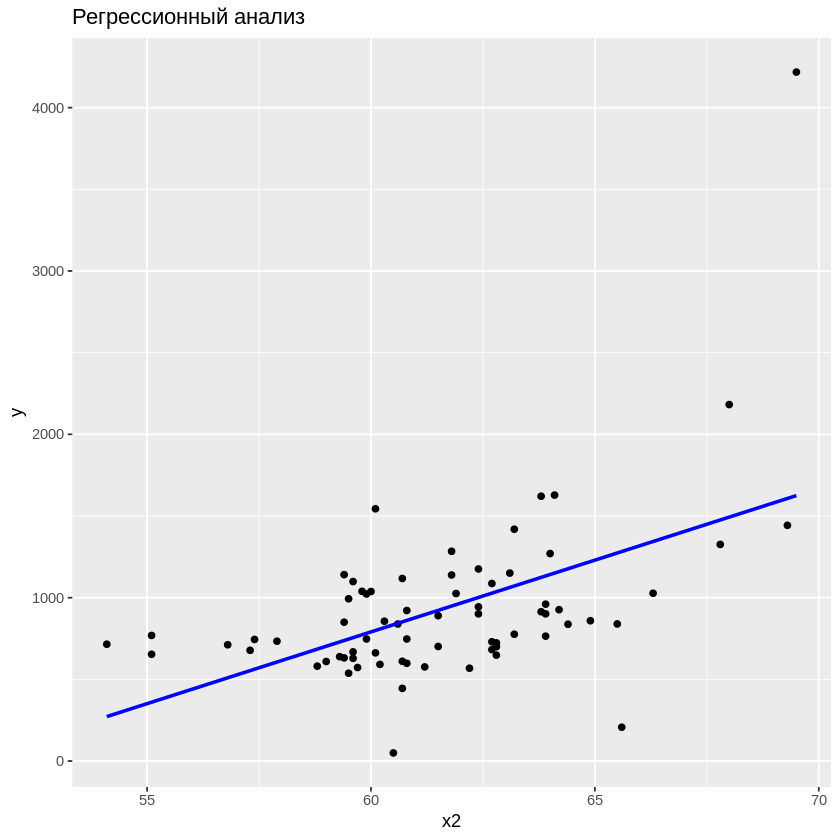

In [ ]:
#строим график y от x2
ggplot(data, aes(x = x2, y = y)) +
  geom_point() + # точки данных
  geom_smooth(method = "lm", se = FALSE, color = "blue") + # линия регрессии
  labs(title = "Регрессионный анализ", x = "x2", y = "y")

`geom_smooth()` using formula = 'y ~ x'


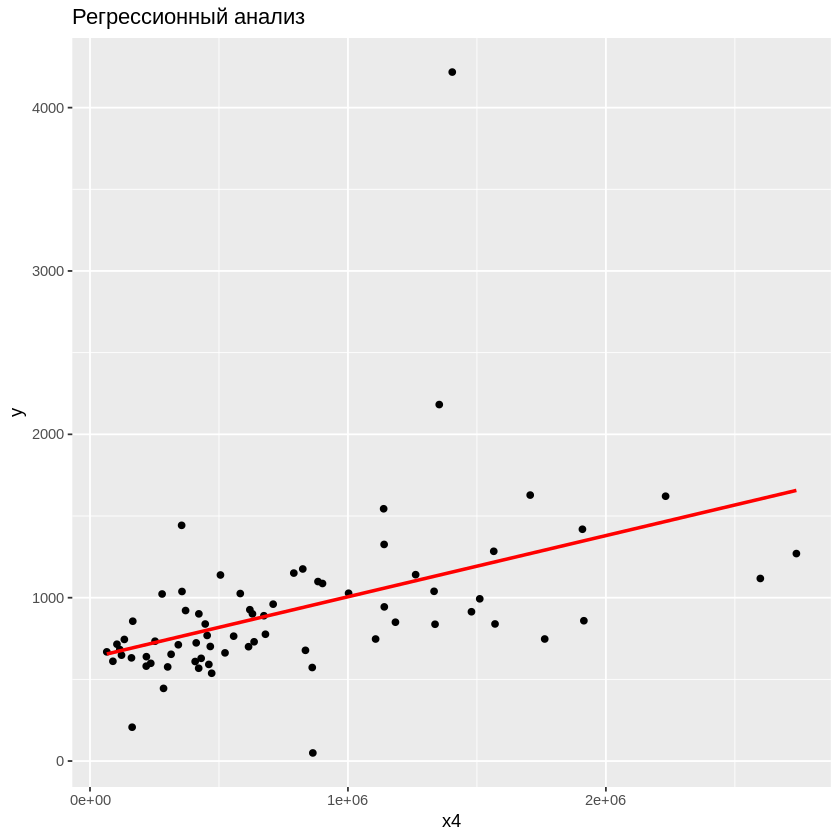

In [ ]:
#строим график y от x4
ggplot(data, aes(x = x4, y = y)) +
  geom_point() + # точки данных
  geom_smooth(method = "lm", se = FALSE, color = "red") + # линия регрессии
  labs(title = "Регрессионный анализ", x = "x4", y = "y")